# Explanatory analysis of Prosper Score (risk) ratings

## Investigation Overview

In this investigation, we will take a look at how various numeric variables (`BorrowerRate`, `EstimatedEffectiveYield`, `EstimatedLoss` and `EstimatedReturn`) and various categorical variables (`LoanStatus`, `IncomeRange` and `BorrowerState`) impact/interact with the `ProsperScore` (risk score).

## Dataset Overview

There are 113,937 entries in the dataset with 81 columns that describe various metrics ranging from risk and grade of a loan to information about the borrower (e.g. - state, income range, ocuppation). None of the data has been manipulated in any way.

Before starting to go through the analysis please have a look at the description of the variables we will be working with here:

https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [8]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [10]:
# convert loan status and Income Range into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Completed', 'Current', 'FinalPaymentInProgress',  'Cancelled', 'Defaulted', 'Chargedoff', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
              'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'IncomeRange': ["Not displayed", "Not employed", "$0","$1-24,999",
                    "$25,000-49,999", "$50,000-74,999","$75,000-99,999","$100,000+"]}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
    else: # pre-v0.21
        df[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Distribution of Prosper Scores (risk scores)

ProsperScore seems to have a normal distribution, with most of the values falling within the 4-8 range.

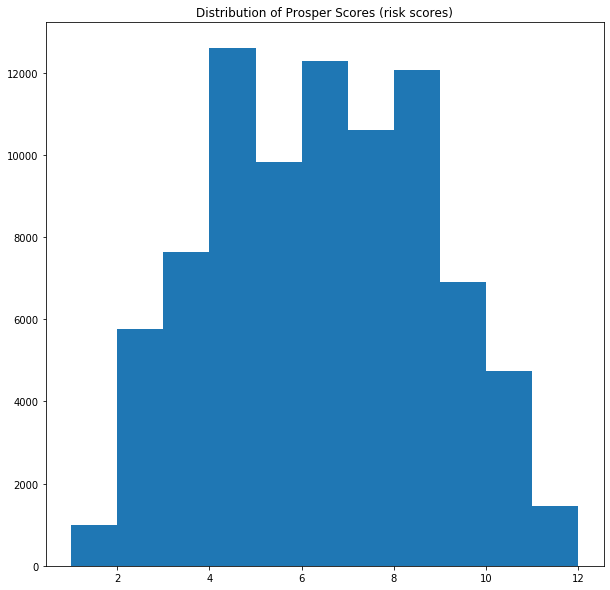

In [11]:
#Standard distribution plot of the ProsperScore variable
bin_edges = np.arange(1, df['ProsperScore'].max()+2,1)
plt.figure(figsize=(10,10))
plt.hist(data = df, x='ProsperScore', bins=bin_edges)
plt.title('Distribution of Prosper Scores (risk scores)');

## Distribution of Borrower Rate values

The `BorrowerRate` distribution seems normal unimodal with a peak for values in the 0.1-0.2 range.

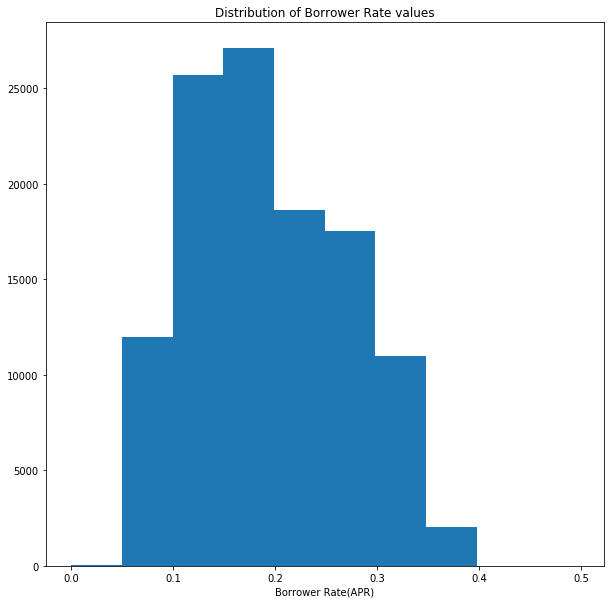

In [12]:
#Standard distribution plot of the Borrower Rate variable
plt.figure(figsize=(10,10))
plt.hist(data = df, x='BorrowerRate')
plt.title('Distribution of Borrower Rate values')
plt.xlabel('Borrower Rate(APR)');

## Distribution of other numerical variables (EstimatedEffectiveYield, EstimatedLoss and EstimatedReturn)

- The `EstimatedEffectiveYield` distribution looks roughly bimodal, with a larger peak between 0.10 and 0.18 values and a smaller peak between the 0.28 and 0.30 values. A longer tail can also be observed for a few negative values ranging from -0.06 to to 0.04 values, which can potentially be considered outliers.
- The `EstimatedLoss` distribution looks unimodal, with a larger peak between the 0.02 and 0.06 value range and a smaller one between the 0.14 and 0.18 value range. This time the tail is longer on the positive side , with the 0.20 - 0.26 and 0.34 and 0.38 ranges displaying values outside the bulk of the distribution.
- Finally, the `EstimatedReturn` distribution looks unimodal, similar to the plot generated above, although we can see some  values in the -0.06 - 0.02 range falling outside the bulk of the distribution.

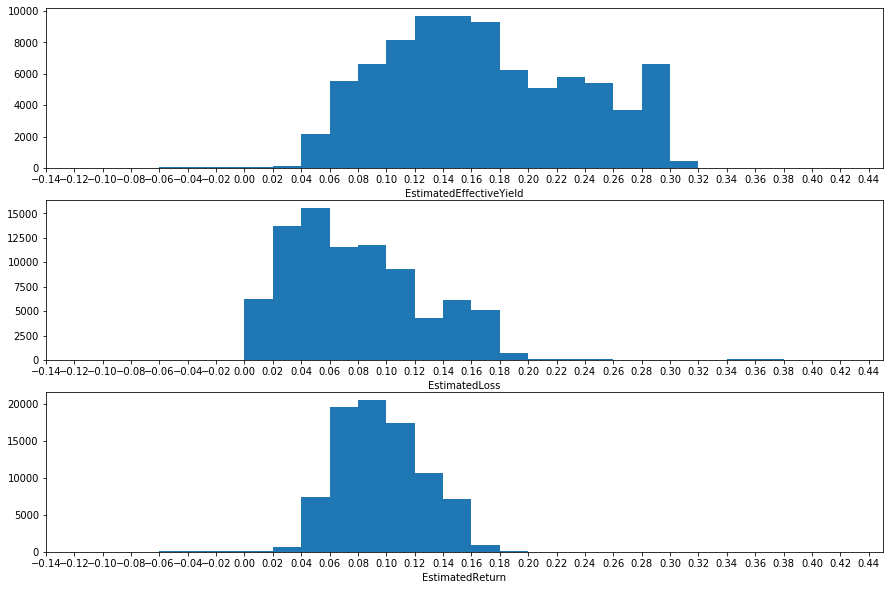

In [13]:
#Distribution plots for the EstimatedEffectiveYield, EstimatedLoss and EstimatedReturn variables on a more granular scale
fig, ax = plt.subplots(nrows=3, figsize = [15,10])

variables = ['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(-0.5, 0.5, 0.02)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel(var)
    ax[i].set_xticks(bins)
    ax[i].set_xlim(-0.14,0.45)
    
plt.show()

## Distribution of loans (counts) per state

CA seems to be the state with the largest amount of loans offered by far, going over 14,000 loans altogether, more than double than the 2nd state has - TX with a little over 6,000 loans.

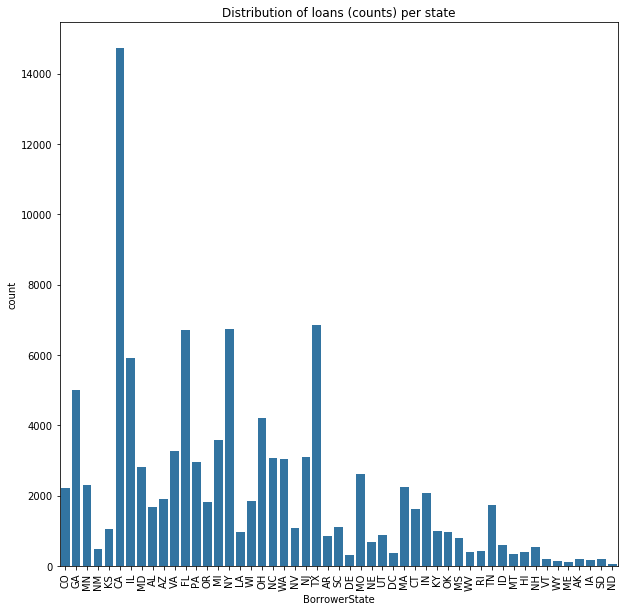

In [14]:
#Standard count plot of loans per borrower state
base_colour=sns.color_palette()[0]
plt.figure(figsize=(10,10))
sns.countplot(data = df, x='BorrowerState', color=base_colour)
plt.xticks(rotation=90)
plt.title('Distribution of loans (counts) per state');

## Distribution of loans (counts) per loan status

A considerable amount of loans have been either completed (~40,000) or are currently ongoing (>55,000) while the number of defaulted and charged off are making up for around 15,000. There is a negligible amount of past date loans compared to the total numbers. 

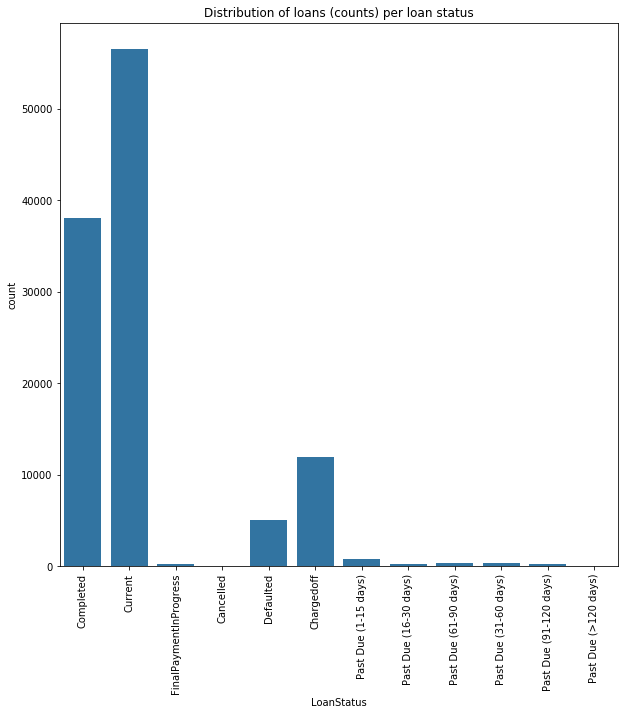

In [15]:
#Standard count plot of loans per loan status
plt.figure(figsize=(10,10))
sns.countplot(data = df, x='LoanStatus', color=base_colour)
plt.xticks(rotation=90)
plt.title('Distribution of loans (counts) per loan status');

## Distribution of loans (counts) per income range

When taking a look at the `IncomeRange` categorical variable we can notice that a majority of loans were given out to customers that fall in the 25,000 - 49,999 and 50,000 - 74,999 ranges (over 60,000 loans). The next 2 ranges - 75,000 - 99,999 and +100,000 make up for another ~30,000 loans.

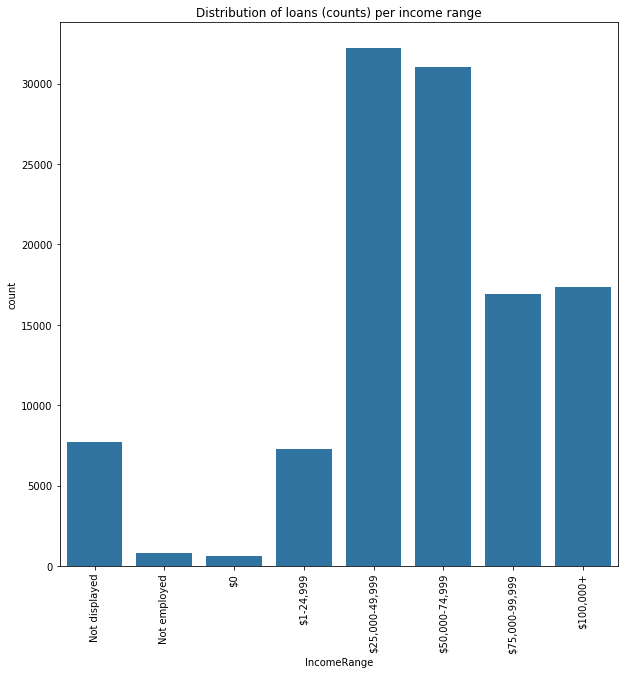

In [16]:
#Standard count plot of loans per income range
plt.figure(figsize=(10, 10))
sns.countplot(data = df, x = 'IncomeRange',color=base_colour)
plt.xlabel('IncomeRange')
plt.xticks(rotation=90)
plt.title('Distribution of loans (counts) per income range');

## Relationship between Prosper score and other numerical variables of interest

- The corellation coefficient for the `ProsperScore` and `EstimatedReturn` variables seems to indicate a weak negative corellation, meaning that the risk score of a loan does not really change based on changes effected to the estimated return. We would have expected that the corellation between the 2 variables to be stronger as high risk loans typically would account for higher estimated returns.
- The rest of the numerical variables - `EstimatedEffectiveYield`, `EstimatedLoss` and `BorrowerRate` show a moderate to high negative corellation in relation to the `ProsperScore` variable which is to be expected.
- The rest of the variables excluding `ProsperScore`seem to have a moderate to strong positive corellation between themselves.

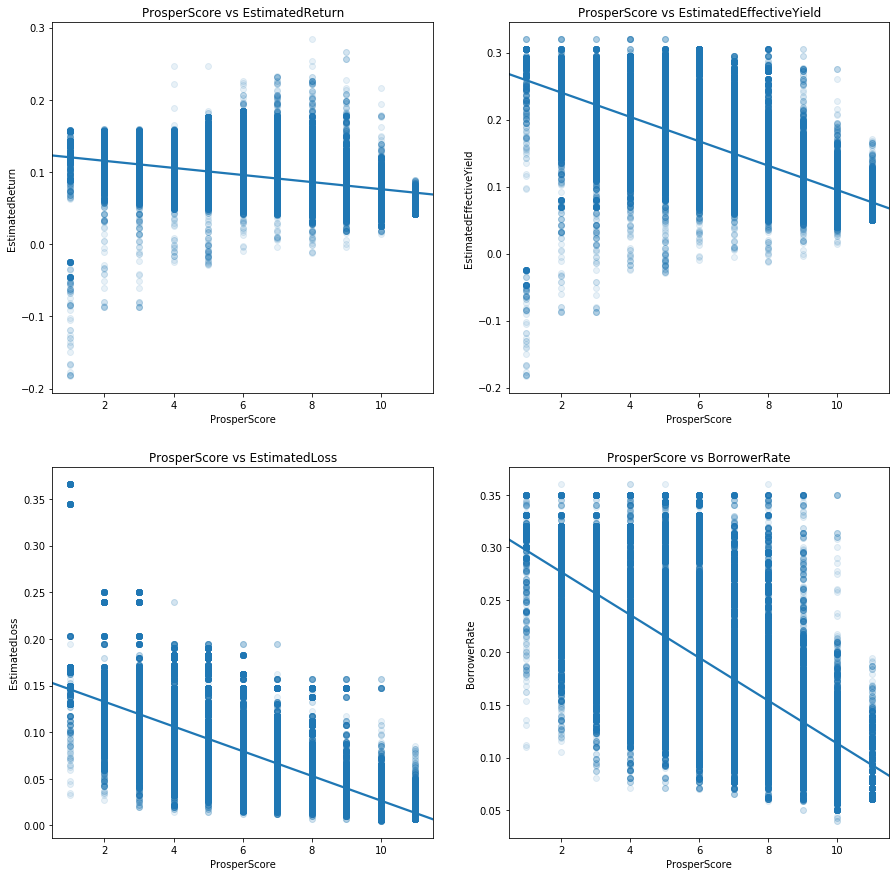

In [17]:
#Corellation plots - ProsperScore vs EstimatedReturn, EstimatedEffectiveYield, EstimatedLoss and BorrowerRate
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
sns.regplot(data = df, x='ProsperScore', y='EstimatedReturn', scatter_kws={'alpha':0.1})
plt.title('ProsperScore vs EstimatedReturn')

plt.subplot(2, 2, 2)
sns.regplot(data = df, x='ProsperScore', y='EstimatedEffectiveYield', scatter_kws={'alpha':0.1})
plt.title('ProsperScore vs EstimatedEffectiveYield')

plt.subplot(2, 2, 3)
sns.regplot(data = df, x='ProsperScore', y='EstimatedLoss', scatter_kws={'alpha':0.1})
plt.title('ProsperScore vs EstimatedLoss')

plt.subplot(2, 2, 4)
sns.regplot(data = df, x='ProsperScore', y='BorrowerRate', scatter_kws={'alpha':0.1})
plt.title('ProsperScore vs BorrowerRate');

## ProsperScore distribution by Loan Status and Income Range

- The distribution of the `ProsperScore` ratings is concentrated betweeen 5 and 8 for Completed loans and between 4 and 8 for Current and FinalPaymentInProgress ones. The values for the interquartile ranges seem to decrease for Defaulted to Past Due loans although not by much, with most Past Due loans in the 3 to 7 ProsperScore range. This is indicative that loans that are not completed or in progress do tend to have a lower ProsperScore, meaning they are more risky.
- The distribution of the `ProsperScore` ratings is concentrated betweeen 4 and 8 for the majority of the IncomeRange brackets. As seen in the boxplot on the right, the distributions interquartile ranges of the risk score increase on the higher income brackets. This indicates that the higher the income the higher the less risky a loan is deemed.

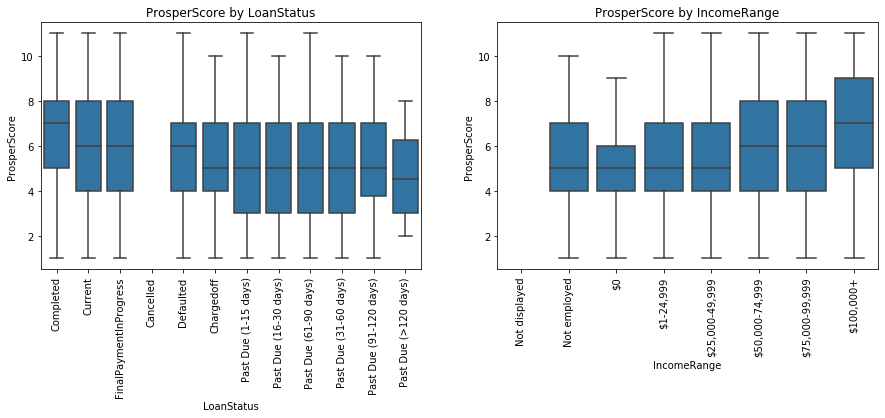

In [18]:
#Box plots for ProsperScore vs LoanStatus and IncomeRange
plt.figure(figsize = [15, 10])

plt.subplot(2, 2, 1)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'LoanStatus', y = 'ProsperScore', color = base_color)
plt.xticks(rotation=90)
plt.title('ProsperScore by LoanStatus')


plt.subplot(2, 2, 2)
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'IncomeRange', y = 'ProsperScore', color = base_color)
plt.xticks(rotation=90)
plt.title('ProsperScore by IncomeRange');

## ProsperScore distribution by Borrower State

Looking at the `ProsperScore` distribution at the state level, we have decided to bucket prosper scores into larger groups in order to provide better clarity for the visualization. Overall it does seem that the majority of the loans are deemed either medium or low risk with no unusual patterns in distribution for any of the states. It seems that Prosper takes a rather cautious and evenly distributed approach with the amount of risk they want to take on their loans.

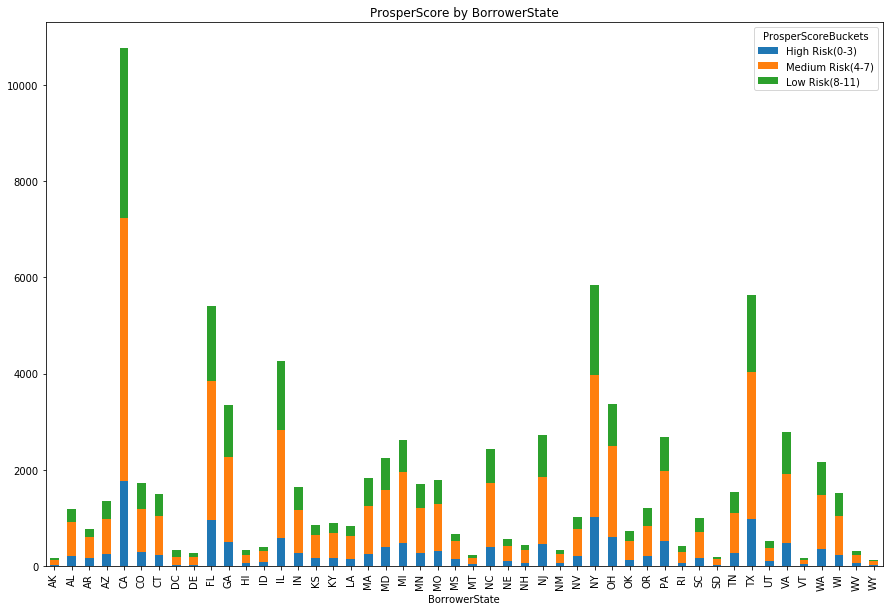

In [19]:
#Barplot for ProsperScoreBuckets by BorrowerState
bin_edges = [0,3,7,11]
bin_names = ['High Risk(0-3)','Medium Risk(4-7)','Low Risk(8-11)']
df['ProsperScoreBuckets'] = pd.cut(df['ProsperScore'], bin_edges, labels=bin_names)
df_plot = df.groupby(['ProsperScoreBuckets', 'BorrowerState']).size().reset_index().pivot(columns='ProsperScoreBuckets', index='BorrowerState', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('ProsperScore by BorrowerState');

## Estimated Return vs Borrower Rate by Prosper Score buckets

When looking at the relationship between `EstimatedReturn` and `BorrowerRate` at each `ProsperScore` score, it seems pretty obvious that using the ProsperScore buckets we have used earlier seem to work better here and provide a much clearer picture. 

The corellation between `BorrowerRate` and `EstimatedReturn` variables is apparently stronger for low risk loans. This means that low risk loans with a high borrower rate translate into higher estimated returns.

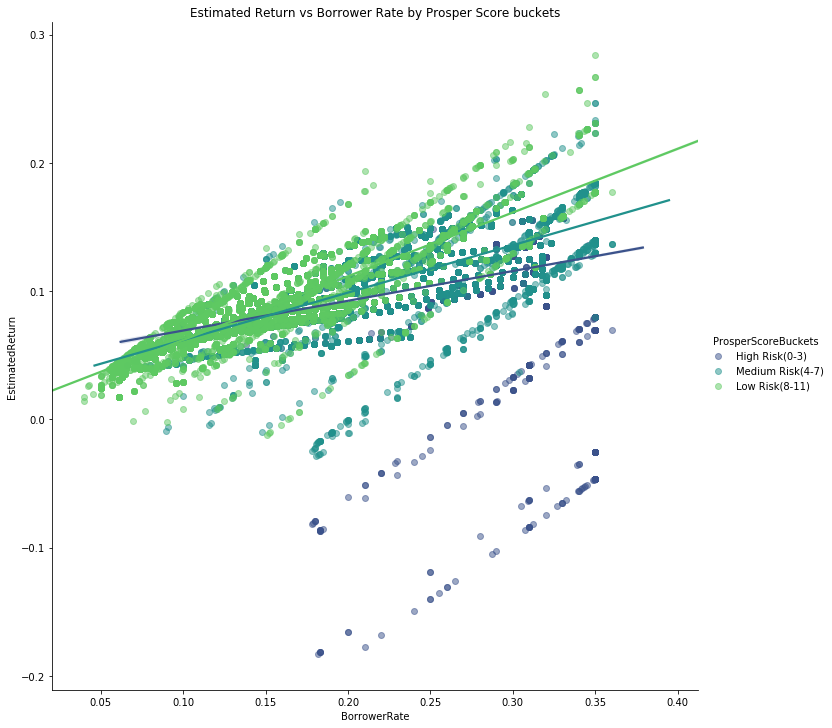

In [20]:
#Scatter plot for BorrowerRate vs EstimatedReturn by ProsperScoreBuckets
g = sns.FacetGrid(data = df, hue = 'ProsperScoreBuckets', height=10, palette = 'viridis')
g.map(sns.regplot, 'BorrowerRate', 'EstimatedReturn', scatter_kws={'alpha':0.5})
g.add_legend()
plt.title('Estimated Return vs Borrower Rate by Prosper Score buckets');

As assumed above, it does seem that a higher positive corellation is present between the `EstimatedReturn` and `BorrowerRate`, especially when the `ProsperScore` values goes between 7 and 11.

In [ ]:
#Scatter plots for BorrowerRate vs EstimatedReturn by individual ProsperScore
g= sns.FacetGrid(data=df, col='ProsperScore', col_wrap=3, height=5)
g.map(sns.regplot, 'BorrowerRate','EstimatedReturn', scatter_kws={'alpha':0.1});

##  Borrower Rate by Income Range and Prosper Score buckets

The last item investigated here is the distribution of `BorrowerRate` values for different `IncomeRange` brackets based on the `ProsperScore`. As observed in the graph above the `BorrowerRate` values for high risk loans seem to have an inconsistent distribution for income ranges labelled as Not employed or 0. This may be due to a lower amount of high risk loans being offered for these groups as it would increase the chance of a default. The next bracket - 1-24,999\$ seems to have the widest interquartile distribution for medium risk loans, meaning that the borrower rate has more flexibility here. The distribution for the next income range brackets seem to be surprisingly even for all the `ProsperScore` buckets.

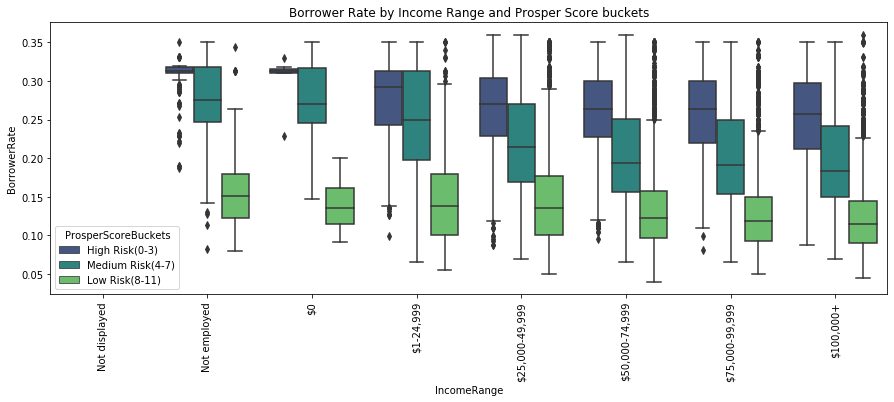

In [22]:
#Box plot for BorrowerRate by IncomeRange and ProsperScoreBuckets
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', hue = 'ProsperScoreBuckets', palette='viridis')
plt.xticks(rotation=90)
plt.title ('Borrower Rate by Income Range and Prosper Score buckets');

In [ ]:
!jupyter nbconvert Prosper_Loan_Data_Explanatory.ipynb --to slides --post serve --template output_toggle